# Logistic Regression/Classification
> In this post, it will cover the basic concept of Logistic Regression, which is widely used in classification tasks. And it will explain what the hypothesis and cost function, and how to solve it with gradient descent as we saw previously.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Tensorflow, Machine_Learning]
- image: images/cross_entropy.png

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['text.usetex'] = True
plt.rc('font', size=15)

## Classification

Classification is the task to classify the data with labels. If we have two kinds of labels, its task is called **binary classification**, and labels more than 2, then that task is **multi-class classification**. In binary classification, variable (or label) is either 0 or 1, or True or False. For example,

- Exam: Pass or Fail
- Spam: Not Spam or Spam
- Face: Real or Fake
- Tumor: Malignant or Benign (or Not Malignant)

To interpret it in model side, we must encode the label through one-hot encoding.

## Logistic Regression

Unlike linear regression, **Logistic Regression** is an regression approach to handle the classification problem. So what's the difference between Logistic Regression and Linear Regression? At first, let's look at the type of data we care.

![logistic_linear](image/logistic_linear_diff.png)

There are two types of data, discrete (counted) and continuous (measured). Roughly speaking, discrete data can count it by hand, so it can classify it with its value. But continous data can only measure its information, and cannot classify it with its value.

## Hypothesis Representation

While we use linear regression, the output $Y$ can calculated from the product of the weight vector $\theta$ and observation $X$, adding bias $b$. Mathematically, we can derive this,

$$ H_{\theta}(X) = \theta^TX + b$$

And we can define the cost function by measuring the error between the hypothesis and actual data. But what about logistic regression? In binary classification task, its output is only 0 or 1. So we cannot bring the same hypothesis and cost functions from linear regression.

So we need a new function to classify it correctly, and here is a new hypothesis.

$$ H_{\theta}(X) = g((\theta^T X)) $$

There is a new function $g(\dot)$ If this function can outputs the probability of True or False, compare it with decision boundary, we can handle the classification problem with logistic regression.

![logistic](image/logistic.png)

## Sigmoid (Logistic) function

And, Sigmoid function is introduced. (Also called logistic function). It has following term,

$$ g(z) = \frac{1}{1 + e^{-z}} $$

and it generates the output between 0 and 1. Suppose that $z$ is changed from $-\infty$ to $\infty$, then

$$ \lim_{z \to -\infty} g(z) = \frac{1}{1 + \infty} = 0 \quad \lim_{z \to \infty} g(z) = \frac{1}{1 + 0} = 1 $$

When the $z = 0$, then $g(z) = 0.5$, so it is reasonable to define the decision boundary to 0.5. If $g(z)$ is less than 0.5, then the function classify its data to negative, and vice versa. 

## Cost Function
Cost function is also changed. Because it cannot measure the difference between the hypothesis and label. In common sense, $H_{\theta}(x) = y$ then cost function must be 0. To do this, we can introduce the new type of cost function, [Cross-Entropy](https://en.wikipedia.org/wiki/Cross_entropy). Cross Entropy measures the average number of bits needed to identify an event. Mathematically, it can expressed like this, if the probability of event happening is $p$,
$$ \text{C.E.} = -y\log(p) - (1-y)\log(1-p) $$

so we can calculate the Cross Entropy in terms of $y$,

$$ \text{C.E.} = \begin{cases} -\log(p) & \text{if } y = 1 \\ -\log(1-p) & \text{if } y=0 \end{cases} $$

We can apply it in cost function,

$$ \text{Cost}(H_{\theta}(x), y) = -y \log(H_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x)) $$

Let's visualize the cost function.

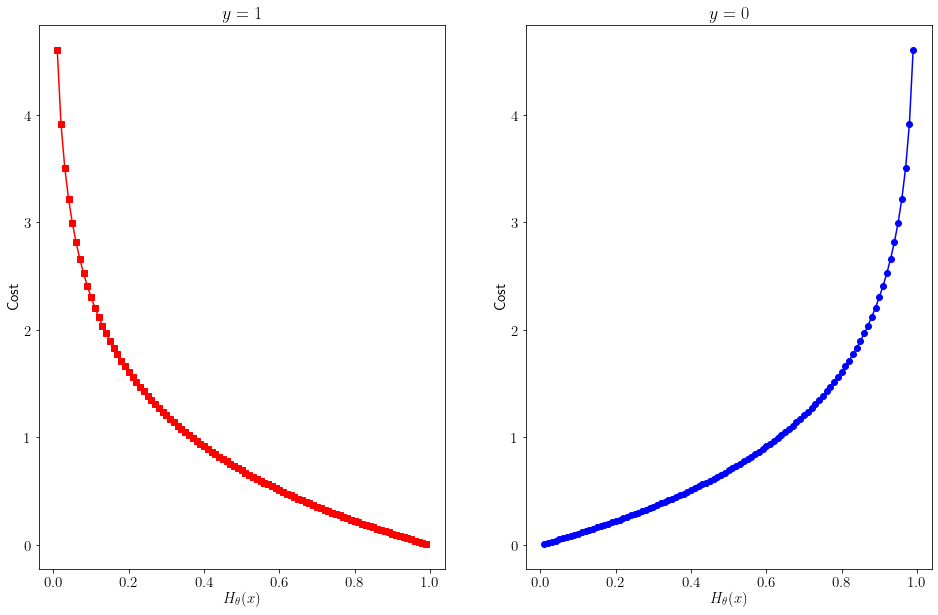

In [8]:
x = np.arange(0.01, 1, 0.01)
y_1 = -np.log(x)
y_2 = -np.log(1-x)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].plot(x, y_1, color='red', marker='s');
ax[0].set_xlabel(r'$H_{\theta}(x)$')
ax[0].set_ylabel('Cost')
ax[0].set_title('$y=1$')
ax[1].plot(x, y_2, color='blue', marker='o');
ax[1].set_xlabel(r'$H_{\theta}(x)$')
ax[1].set_ylabel('Cost')
ax[1].set_title('$y=0$')

plt.show()

## Optimization

We defined the cost function with Cross-entropy, we need to minimize it to make the model correctly classified, and Gradient Descent can apply this. As you noticed before, it requires to calculate the gradient.

Actually, when you try implement it with tensorflow, you don't need to calculate the gradient manually. 

## Logistic Regression in Tensorflow
Let's build the Logistic Regression model with tensorflow. Before beginning, let's analyze the sample data patterns.

We made a sample data like this,

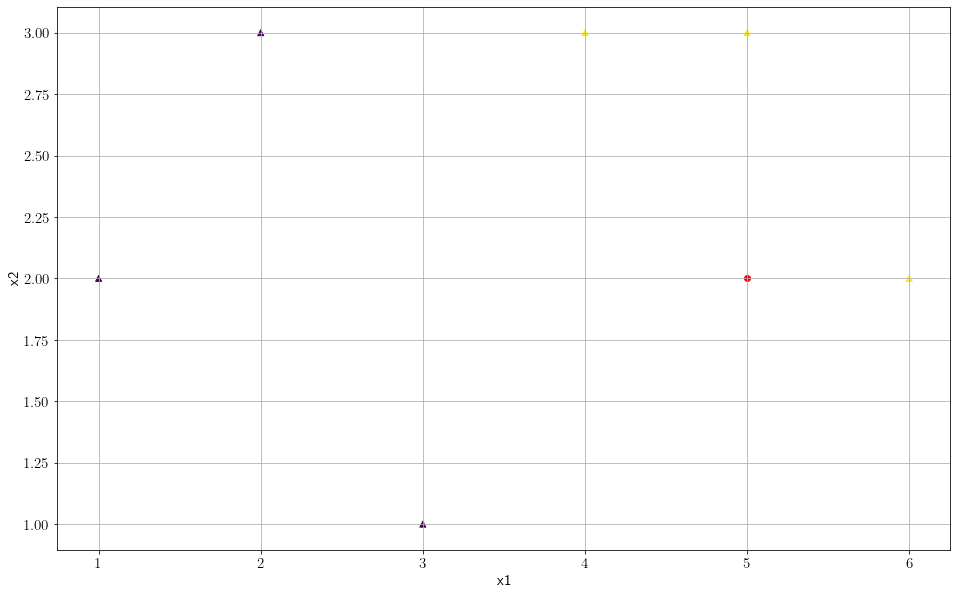

In [4]:
# Training data
x_train = [[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

# Test data
x_test = [[5., 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

# Visualize it
colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Actually, we defined the dataset with python list. But to handle it with tensorflow, it need to convert tensor type. Let's define the whole process.

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Initialize Weight and bias
W = tf.Variable(tf.zeros([2, 1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

# Sigmoid Function
def sigmoid(X):
    h = tf.divide(1., 1. + tf.exp(-(tf.matmul(X, W) + b)))
    return h

# Loss function 
def loss_fn(h, y):
    cost = -tf.reduce_mean(y * tf.math.log(h) + (1 - y) * tf.math.log(1 - h))
    return cost

# Optimizer (Stochastic Gradient Descent)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Accuracy function for decision boundary
def accuracy_fn(h, y):
    y_hat = tf.cast(h > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_hat, y), dtype=tf.int32))
    return accuracy

# Gradient function
def grad(X, y):
    with tf.GradientTape() as tape:
        h = sigmoid(X)
        loss = loss_fn(h, y)
    return tape.gradient(loss, [W, b])

With this function, we will build the training step,

In [6]:
for e in range(1000):
    for x, y in iter(dataset.batch(len(x_train))):
        h = sigmoid(x)
        grads = grad(x, y)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        
        if e % 100 == 0:
            print('Epoch: {}, Loss: {:.4f}'.format(e, loss_fn(h, y)))

Epoch: 0, Loss: 0.6931
Epoch: 100, Loss: 0.5781
Epoch: 200, Loss: 0.5352
Epoch: 300, Loss: 0.5056
Epoch: 400, Loss: 0.4840
Epoch: 500, Loss: 0.4673
Epoch: 600, Loss: 0.4537
Epoch: 700, Loss: 0.4421
Epoch: 800, Loss: 0.4320
Epoch: 900, Loss: 0.4229


You can see the cost is decreasing in each epoch. Weight $W$ and bias $b$ is stored in memory, so we can test it with test dataset.

In [7]:
test_accuracy = accuracy_fn(sigmoid(x_test), y_test)
print('Test Result = {}'.format(tf.cast(sigmoid(x_test) > 0.5, dtype=tf.int32)))
print('Test Accuracy: {:.4f}'.format(test_accuracy))

Test Result = [[1]]
Test Accuracy: 1.0000


We can see that the model correctly classified test set based on trained weight and bias.

## Logistic Regression with diabetes classification

Let's look at more complicated dataset. Diabetes dataset, released from [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/diabetes), is common dataset for classification. Let's apply the same approach in this dataset.

In [12]:
df = pd.read_csv('./dataset/diabetes.csv')
df.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

As you can see, the scale is different from each variable. So we need to standardizing it.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, [-1]].to_numpy()

X = X.astype(np.float32)
y = y.astype(np.float32)

# Standardize the data
ss = StandardScaler()
X = ss.fit_transform(X)

# Split with training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print(X_train.shape, y_train.shape)
print(X_train)

(460, 8) (460, 1)
[[-5.4791862e-01 -1.1859907e+00 -2.1224350e-01 ...  6.1015427e-01
   4.7453222e-01 -7.8628618e-01]
 [ 4.6014335e-02  6.5895163e-02  5.6322277e-01 ...  9.4197702e-04
  -8.7209895e-02  6.4591348e-02]
 [ 4.6014335e-02 -3.4096771e-01 -1.6054575e-01 ... -1.1749996e-02
  -2.6465813e-03 -3.6084738e-01]
 ...
 [ 1.2338802e+00  2.1002097e+00  4.5982724e-01 ...  2.0189581e+00
  -1.0113661e+00  8.3038110e-01]
 [ 1.2338802e+00 -1.1546935e+00  2.5303626e-01 ...  8.0053312e-01
  -4.4928238e-02  4.9003014e-01]
 [-5.4791862e-01 -6.8523633e-01  4.6245251e-02 ... -1.4713213e+00
  -7.1539456e-01 -5.3102291e-01]]


Let's try!

In [39]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(len(X_train))

In [40]:
W = tf.Variable(tf.random.normal((8, 1)), name='weight')
b = tf.Variable(tf.random.normal((1,)), name='bias')

In [41]:
for e in range(2000):
    for x, y in iter(dataset.batch(len(X_train))):
        h = sigmoid(x)
        grads = grad(x, y)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        
        if e % 100 == 0:
            print('Epoch: {}, Loss: {:.4f}'.format(e, loss_fn(h, y)))

Epoch: 0, Loss: 0.9894
Epoch: 100, Loss: 0.8589
Epoch: 200, Loss: 0.7700
Epoch: 300, Loss: 0.7060
Epoch: 400, Loss: 0.6584
Epoch: 500, Loss: 0.6217
Epoch: 600, Loss: 0.5928
Epoch: 700, Loss: 0.5695
Epoch: 800, Loss: 0.5504
Epoch: 900, Loss: 0.5344
Epoch: 1000, Loss: 0.5210
Epoch: 1100, Loss: 0.5095
Epoch: 1200, Loss: 0.4996
Epoch: 1300, Loss: 0.4910
Epoch: 1400, Loss: 0.4836
Epoch: 1500, Loss: 0.4771
Epoch: 1600, Loss: 0.4714
Epoch: 1700, Loss: 0.4664
Epoch: 1800, Loss: 0.4620
Epoch: 1900, Loss: 0.4582


After training, we can validate model performance with test dataset. In this time, we want to measure whether model is correctly classified or not, so it can write the test_accuracy manually.

In [55]:
y_hat = tf.cast(sigmoid(X_test) > 0.5, dtype=tf.int32)
# print('Test Result = {}'.format(tf.cast(sigmoid(X_test) > 0.5, dtype=tf.int32)))
print('Test Accuracy: {:.4f}'.format(np.sum(y_test.reshape(-1) == y_hat.numpy().reshape(-1)) / y_test.shape[0]))

Test Accuracy: 0.7468


## Summary
In this post, we cover the basic definition of logistic regression. Logistic regression is the approach to handle the classification task. So its hypothesis and cost function are different from that in linear regression. For cost function, Cross-Entropy is introduced, and we can implement whole process with tensorflow 2.x.